In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import circularFiltering as flt
from scipy.stats import vonmises
from scipy.special import i0, i1
from scipy.stats import norm
import circularFiltering as flt
import matplotlib
import glob
import re
import os
matplotlib.rcParams.update({'font.size': 14,
                            'pdf.fonttype': 42,
                            'ps.fonttype': 42})
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [5]:
preprocess = False # only set to True if you want to re-run preprocessing on data in /data_raw

path_raw = 'data_raw/figure4g/'
path_processed = 'data_processed/'

## Figure 4g,h - Performance of Drosophila-like network

In [4]:
# make unique list of parameter values
fileNames = glob.glob(os.path.join(path_raw+"*.npz"))
kappa_z_array = np.array( [ re.findall('(?<=kappaz=)(.*)(?=\.)', name) for name in fileNames ] )[:,0]
kappa_z_array = np.unique(kappa_z_array.astype(float))
len_kz = len(kappa_z_array)


if preprocess:
    vonMises_stats = np.zeros([len_kz,3]) # 1st (bias + variance) and 2nd order statistics for each kappa_z,
    vonMises_q_stats = np.zeros([len_kz,3])
    CX_stats = np.zeros([len_kz,3])

    for i in np.arange(len_kz):
        kappa_z = kappa_z_array[i]
        filename = path_raw+"performance_kappaz="+str(kappa_z)
        data = np.load(filename+'.npz')

        # simulation data arrays, mean and kappa (r for PF) for each run
        vonMises=data['vonMises']
        vonMises_q=data['vonMises_q']
        CX = data['CX']
        phi_final = data['phi_final']

        # collect 2nd order statistics at end of simulation(precision as computed by filter)
        vonMises_stats[i,2] = np.mean(vonMises[:,1])
        vonMises_q_stats[i,2] = np.mean(vonMises_q[:,1])
        CX_stats[i,2] = np.mean(data['CX'][:,1])


        # collect 1st order statistics (bias as phase of circular mean, precision as radius of circular mean)
        vonMises_stats[i,[0,1]] = flt.circular_mean(flt.backToCirc(vonMises[:,0]-phi_final))
        vonMises_q_stats[i,[0,1]] = flt.circular_mean(flt.backToCirc(vonMises_q[:,0]-phi_final))
        CX_stats[i,[0,1]] = flt.circular_mean(flt.backToCirc(CX[:,0]-phi_final))
    
    # save the preprocessed data
    np.savez(path_processed+'figure4g',
        vonMises_stats=vonMises_stats,vonMises_q_stats=vonMises_q_stats,CX_stats=CX_stats)

else:
    data = np.load(path_processed+'figure4g.npz')
    vonMises_stats = data['vonMises_stats']
    vonMises_q_stats = data['vonMises_q_stats']
    CX_stats = data['CX_stats']

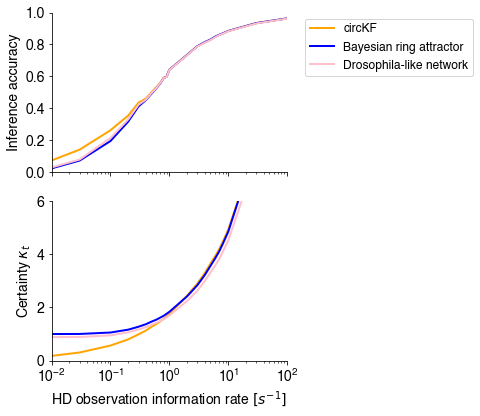

In [5]:
fig, (ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize = (7,6),sharex=True,tight_layout=True)

ax1.plot(kappa_z_array,vonMises_stats[:,1],label='circKF',linewidth=2,color='orange')
ax1.plot(kappa_z_array,vonMises_q_stats[:,1],label='Bayesian ring attractor',linewidth=2,color='blue')
ax1.plot(kappa_z_array,CX_stats[:,1],label='Drosophila-like network',linewidth=2,color='pink')
ax1.set_ylabel(r'Inference accuracy')
ax1.set_xscale('log')
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_ylim([0,1])
ax1.set_xlim([kappa_z_array[0],kappa_z_array[-1]])
ax1.legend(prop={"size":12},loc='upper left',bbox_to_anchor=(1.05, 1.0))

ax2.plot(kappa_z_array,vonMises_stats[:,2],label='circKF',linewidth=2,color='orange')
ax2.plot(kappa_z_array,vonMises_q_stats[:,2],label='Bayesian ring attractor',linewidth=2,color='blue')
ax2.plot(kappa_z_array,CX_stats[:,2],label='Drosophila-like network',linewidth=2,color='pink')
ax2.set_ylabel(r'Certainty $\kappa_t$')
ax2.set_xlabel(r'HD observation information rate $[s^{-1}]$')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.set_ylim([0,6])
plt.show()